# Python 速習とテーブルデータの基本操作

▼ 本章で使用するデータ  

- [covid_data.csv](https://drive.google.com/file/d/1pu4Y-QvHA1TNQRN_6tTyZ7Fp7bgBR6Ft/view?usp=sharing)

▼ 本章の構成  

- GoogleDrive のマウント
- パスの設定
- 必要なモジュールのインポート
- 基本的なテーブルデータ操作 (Pandas)
- 基本的なデータの可視化 (Matplotlib, Seaborn)
- データの集計操作
- 欠損値対応
- 質的変数への対応

---

## GoogleDrive のマウント

In [ ]:
# # コメントアウトを外して実行してください
# from google.colab import drive
# drive.mount('/content/drive/')

## パスの設定
講義資料と同じコードで実装が進められるようにパスの設定を行います。data フォルダまでのパスを `data_path` という変数に格納しておきます。講義資料と同じ階層でデータを格納している場合は以下のコードをそのまま実行してください。

In [ ]:
# パスの設定
data_path = ''

## 必要なモジュールのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 10, 5 # 描画サイズの設定

# 警告非表示
import warnings
warnings.filterwarnings('ignore')

## 基本的なテーブルデータ操作 (Pandas)

まずは Pandas を使用したデータ操作の基本を確認しましょう。

- データの読み込み
- データの切り分け
- データの並び替え
- 列の削除・追加
- データの絞り込み

### データの読み込み
まずはデータセットの読み込みから行いましょう。[covid_data.csv](drive/MyDrive/quick/data/covid_data.csv) を使用します。

In [2]:
# データの読み込み
df = pd.read_csv(f'{data_path}/covid_data.csv', index_col='date', parse_dates=True) # date 列をインデックス列に指定
df.head()

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population
date,,,,,,,,,
2021-10-11,ABW,North America,Aruba,19.0,1.0,145948.972,1585.895,NaN,107195.0
2021-10-12,ABW,North America,Aruba,18.0,0.0,146116.890,1585.895,NaN,107195.0
2021-10-13,ABW,North America,Aruba,0.0,0.0,146116.890,1585.895,NaN,107195.0
2021-10-14,ABW,North America,Aruba,29.0,0.0,146387.425,1585.895,NaN,107195.0
2021-10-15,ABW,North America,Aruba,10.0,0.0,146480.713,1585.895,NaN,107195.0


Pandas で読み込んだものはデータフレームと呼ばれます。データの読み込みが完了しましたら、まず `shape` でデータのサンプル数や変数の数を確認する癖をつけておきましょう。  

In [3]:
df.shape

(23728, 9)

今回のデータセットはサンプル数が 23728 個、変数は 9 個あることがわかりました。

In [4]:
# データの確認（先頭3件）
df.head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population
date,,,,,,,,,
2021-10-11,ABW,North America,Aruba,19.0,1.0,145948.972,1585.895,NaN,107195.0
2021-10-12,ABW,North America,Aruba,18.0,0.0,146116.890,1585.895,NaN,107195.0
2021-10-13,ABW,North America,Aruba,0.0,0.0,146116.890,1585.895,NaN,107195.0


各カラムの詳細は以下を参照してください。  

| 列名 | 説明 |
| ---------- | ---------- |
| date| データの取得日 |
| iso_code | 国名コード |
| continent | 大陸名 |
| location | 国名 |
| new_cases | 新規感染者数 |
| new_deaths | 新規死者数 |
| total_cases_per_million | 百万人あたりの合計感染者数 |
| total_deaths_per_million | 百万人あたりの合計死者数 |
| total_tests_per_thousand | 千人あたりの合計検査数 |
| population | 人口 |

In [5]:
# データの確認（末尾3件）
df.tail(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population
date,,,,,,,,,
2022-01-16,ZWE,Africa,Zimbabwe,441.0,9.0,14979.820,347.664,119.071,15092171.0
2022-01-17,ZWE,Africa,Zimbabwe,382.0,11.0,15005.131,348.393,NaN,15092171.0
2022-01-18,ZWE,Africa,Zimbabwe,NaN,NaN,15005.131,348.393,NaN,15092171.0


In [6]:
# 基本情報の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23728 entries, 2021-10-11 to 2022-01-18
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  23728 non-null  object 
 1   continent                 22428 non-null  object 
 2   location                  23728 non-null  object 
 3   new_cases                 22727 non-null  float64
 4   new_deaths                21399 non-null  float64
 5   total_cases_per_million   22682 non-null  float64
 6   total_deaths_per_million  21323 non-null  float64
 7   total_tests_per_thousand  8344 non-null   float64
 8   population                23528 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.8+ MB


In [7]:
# 要約統計量の確認
df.describe()

,new_cases,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population
count,2.272700e+04,21399.000000,22682.000000,21323.000000,8344.000000,2.352800e+04
mean,1.825464e+04,138.156176,59135.597814,951.562042,1756.101110,1.350157e+08
std,1.228185e+05,656.999407,60769.572341,1010.394458,2895.849384,6.735454e+08
min,-1.149000e+03,-165.000000,8.602000,3.101000,9.094000,4.700000e+01
25%,0.000000e+00,0.000000,4733.656250,117.978000,248.142250,6.583910e+05
50%,1.430000e+02,2.000000,41875.254000,630.972000,875.894500,6.896655e+06
75%,1.741500e+03,19.000000,94784.577000,1589.620500,1888.801750,3.173213e+07
max,3.701647e+06,10069.000000,386379.502000,6104.573000,23364.957000,7.874966e+09


### データの切り分け

統計モデルや機械学習モデルを作成する際は、データを説明変数と目的変数に分割することが多いです。今回は説明変数 `x` と目的変数 `t` として 1 つのデータフレームから分割してみます。`total_deaths_per_million` を目的変数として分割してみましょう。  

方法は様々ありますが、今回は `drop()` メソッドを使用します。

In [8]:
# 説明変数の分割
x = df.drop(['total_deaths_per_million'], axis=1)
x.head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population
date,,,,,,,,
2021-10-11,ABW,North America,Aruba,19.0,1.0,145948.972,NaN,107195.0
2021-10-12,ABW,North America,Aruba,18.0,0.0,146116.890,NaN,107195.0
2021-10-13,ABW,North America,Aruba,0.0,0.0,146116.890,NaN,107195.0


In [9]:
# 目的変数の分割
t = df['total_deaths_per_million']
t.head(3)

date
2021-10-11    1585.895
2021-10-12    1585.895
2021-10-13    1585.895
Name: total_deaths_per_million, dtype: float64

### データの並び替え
データの中身を確認するときに降順や昇順で並び替えて、確認したい場合もあります。`sort_values('ソートする列名')` メソッドで並び替えは可能です。  

それでは `total_deaths_per_million` に関して、並び順を変更してみましょう。  

In [10]:
df.sort_values('total_deaths_per_million', ascending=False) # ascending=Falseにすることで降順で表示

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,population
date,,,,,,,,,
2022-01-18,PER,South America,Peru,62098.0,181.0,79984.136,6104.573,NaN,33359415.0
2022-01-17,PER,South America,Peru,0.0,0.0,78122.653,6099.148,NaN,33359415.0
2022-01-16,PER,South America,Peru,43592.0,88.0,78122.653,6099.148,NaN,33359415.0
2022-01-15,PER,South America,Peru,49745.0,74.0,76815.915,6096.510,NaN,33359415.0
2022-01-14,PER,South America,Peru,39080.0,47.0,75324.732,6094.292,NaN,33359415.0
...,...,...,...,...,...,...,...,...,...
2022-01-14,WSM,Oceania,Samoa,0.0,NaN,14.989,NaN,NaN,200144.0
2022-01-15,WSM,Oceania,Samoa,0.0,NaN,14.989,NaN,NaN,200144.0
2022-01-16,WSM,Oceania,Samoa,0.0,NaN,14.989,NaN,NaN,200144.0


### 列の削除・追加
列を削除する方法は `.drop(labels=列名)` で実行できます。列を削除する際には `axis=1` と指定する必要がある点に注意しましょう。（デフォルトでは `axis=0`(行方向)です。）  

`total_deaths_per_million'` の列を削除し、その後戻してみましょう。

In [11]:
# total_deaths_per_million 列を変数に格納しておく（後で戻すため）
total_deaths_per_million = df['total_deaths_per_million']

# total_deaths_per_million 列を削除
df = df.drop(labels='total_deaths_per_million', axis=1)

In [12]:
df.head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population
date,,,,,,,,
2021-10-11,ABW,North America,Aruba,19.0,1.0,145948.972,NaN,107195.0
2021-10-12,ABW,North America,Aruba,18.0,0.0,146116.890,NaN,107195.0
2021-10-13,ABW,North America,Aruba,0.0,0.0,146116.890,NaN,107195.0


`total_deaths_per_million` 列が削除されていることが確認できました。それでは削除した列を改めて追加しましょう。  

In [13]:
# total_deaths_per_million 列を追加
df['total_deaths_per_million'] = total_deaths_per_million # 新しい列名を指定して代入
df.head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,ABW,North America,Aruba,19.0,1.0,145948.972,NaN,107195.0,1585.895
2021-10-12,ABW,North America,Aruba,18.0,0.0,146116.890,NaN,107195.0,1585.895
2021-10-13,ABW,North America,Aruba,0.0,0.0,146116.890,NaN,107195.0,1585.895


列の位置は変化しましたが、再度 `total_deaths_per_million` を追加できました。

### データの絞り込み
特定の条件に合致するデータに絞り込む方法も確認しておきます。

In [14]:
# location が Japan　のデータに絞り込み
df[df['location']=='Japan'].head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,JPN,Asia,Japan,369.0,20.0,13605.023,193.135,126050796.0,142.458
2021-10-12,JPN,Asia,Japan,607.0,29.0,13609.839,193.596,126050796.0,142.689
2021-10-13,JPN,Asia,Japan,731.0,33.0,13615.638,194.055,126050796.0,142.950


複数の条件で絞り込むこともできます。OR 条件の場合は `|`、AND 条件の場合は `&` で条件を接続します。  

各条件を`()`で括る必要がある点に注意しましょう。

In [15]:
# location が Japan　かつ total_deaths_per_million が 100 以上
df[(df['location']=='Japan') & (df['total_deaths_per_million'] >= 100)].head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,JPN,Asia,Japan,369.0,20.0,13605.023,193.135,126050796.0,142.458
2021-10-12,JPN,Asia,Japan,607.0,29.0,13609.839,193.596,126050796.0,142.689
2021-10-13,JPN,Asia,Japan,731.0,33.0,13615.638,194.055,126050796.0,142.950


In [16]:
# location が Japan　または　total_deaths_per_million が 100 以上
df[(df['location']=='Japan') | (df['total_deaths_per_million'] >= 100)].head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,ABW,North America,Aruba,19.0,1.0,145948.972,NaN,107195.0,1585.895
2021-10-12,ABW,North America,Aruba,18.0,0.0,146116.890,NaN,107195.0,1585.895
2021-10-13,ABW,North America,Aruba,0.0,0.0,146116.890,NaN,107195.0,1585.895


## 基本的なデータの可視化 (Matplotlib, Seaborn)

データの性質を知るためには、データを様々な図で可視化することが有効です。可視化の方法はたくさんありますが、ここでは代表的なものをピックアップして確認します。

- 分布の把握
- 傾向の把握
- 相関の把握

### 【補足】データの種類
データは大きく 2 種類に分けられます。質的変数と量的変数です。質的変数はカテゴリカルな値で、離散値を取ります。量的変数は連続値になります。具体例は以下です。

- 質的変数：満足度（5 段階評価）、性別（男女）、ランキング（10 段階）
- 量的変数：身長、売上、気温

データの種類により可視化の方法も変えることが効果的ですので、データの種類についても押さえておきましょう。

### 分布の把握：棒グラフ

質的変数において、各カテゴリ毎の分布を把握する際には**棒グラフ**で可視化します。今回のデータでは大陸 (`continent`) は質的変数にあたるため、こちらを可視化してみましょう。  

Matplotlib では `bar()` 関数で棒グラフを可視化できます。

In [17]:
x = df['continent'].value_counts().index  # 横軸の値
height = df['continent'].value_counts().values  # 　縦軸の値

print(x, height)

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object') [5500 5100 5000 3500 2028 1300]


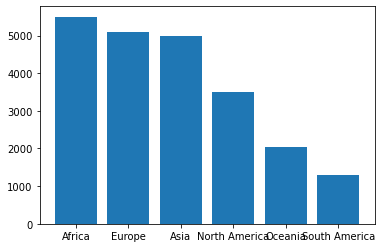

In [18]:
# 棒グラフの描画
plt.bar(x, height);

Seaborn というライブラリを使用して棒グラフを可視化することも可能です。

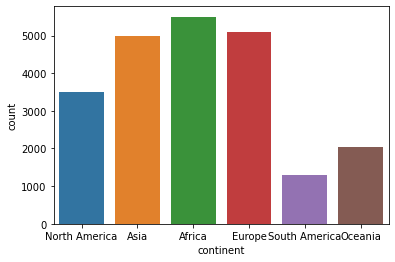

In [19]:
# seaborn を使う場合
sns.countplot(df['continent']);

このデータセットには、Africa のデータが最も多いことがわかりました。

### 分布の把握：ヒストグラム

量的変数の分布を把握する際には、ヒストグラムを使用します。

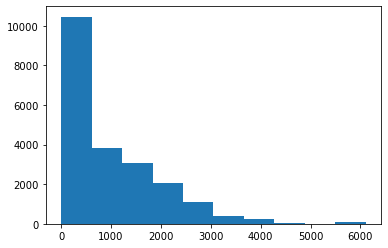

In [20]:
# ヒストグラムの描画
plt.hist(df['total_deaths_per_million']);

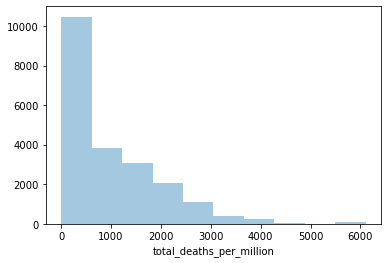

In [21]:
# seaborn を使う場合
sns.distplot(df['total_deaths_per_million'], kde=False, bins=10);

データの分布を把握することで、外れ値の有無や、欠損値補完の方法を考察する助けになります。  

### 傾向の把握：折れ線グラフ

量的変数の時間軸に沿った変化傾向を見る際には、折れ線グラフで可視化を行います。

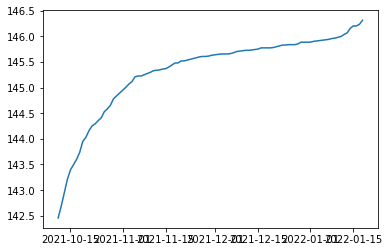

In [22]:
# 日本のデータのみを取得
japan = df[df['location'] == 'Japan']
# 日本の total_deaths_per_million を取得
total_deaths = japan['total_deaths_per_million']
plt.plot(total_deaths);

### 相関関係の把握：散布図、ヒートマップ

今までの可視化は 1 変数に絞った可視化でしたが、相関関係は 2 変数に着目します。2 変数間の相関関係を把握する際には、散布図やヒートマップを用います。

#### 散布図

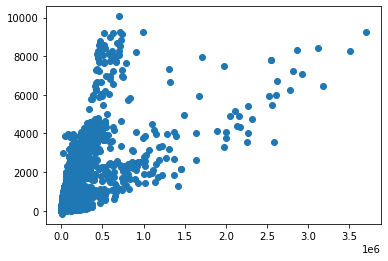

In [23]:
# 散布図の描画
plt.scatter(df['new_cases'], df['new_deaths']);

#### ヒートマップ

変数が多い場合にはすべての変数同士の散布図を確認するのは大変です。その場合には、グラフではなく相関係数を色付きで表示するヒートマップによる可視化が有効です。

In [24]:
# 相関係数の算出
df_corr = df.corr()
df_corr

,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
new_cases,1.000000,0.708971,0.072576,0.047405,0.526319,0.072821
new_deaths,0.708971,1.000000,0.024643,-0.025522,0.785291,0.077031
total_cases_per_million,0.072576,0.024643,1.000000,0.441086,-0.080106,0.681603
total_tests_per_thousand,0.047405,-0.025522,0.441086,1.000000,-0.110850,0.025992
population,0.526319,0.785291,-0.080106,-0.110850,1.000000,-0.055998
total_deaths_per_million,0.072821,0.077031,0.681603,0.025992,-0.055998,1.000000


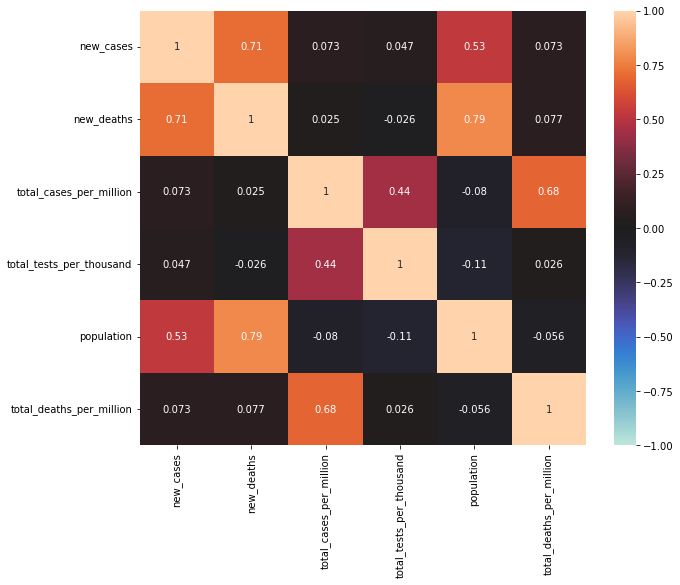

In [25]:
# 相関係数をヒートマップで描画
plt.figure(figsize=(10, 8)) # 出力サイズの調整
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, center=0);

## 【補足】Matplotlib の描画方法について

Matploblib を使用した可視化の際、グラフのラベルや凡例、罫線の表示等、様々な点を工夫することが可能です。簡単なサンプルデータを作成して表示の変更方法を確認します。

In [26]:
# グラフ内で日本語を使用する場合はこちらを使用
# !pip install -q japanize_matplotlib
import japanize_matplotlib

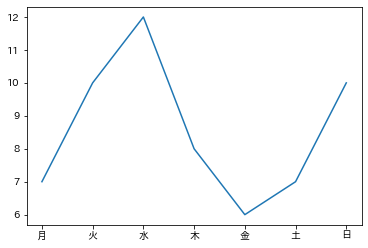

In [27]:
# サンプルデータの表示
plt.plot(['月', '火', '水', '木', '金', '土', '日'], 
         [7, 10, 12, 8, 6, 7, 10])

上記のグラフに各軸の説明とタイトル、罫線を追加します。

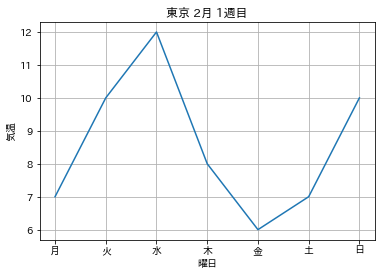

In [28]:
# サンプルデータの表示
plt.plot(['月', '火', '水', '木', '金', '土', '日'], 
         [7, 10, 12, 8, 6, 7, 10])
plt.xlabel('曜日')
plt.ylabel('気温')
plt.title('東京 2月 1週目')
plt.grid()

それでは、データを 1 組追加して、凡例を表示させてみましょう。

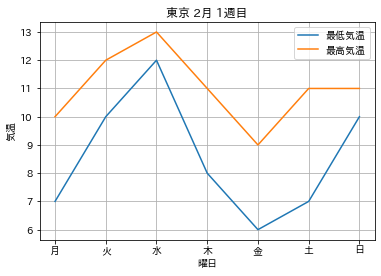

In [29]:
# サンプルデータの表示
plt.plot(['月', '火', '水', '木', '金', '土', '日'], 
         [7, 10, 12, 8, 6, 7, 10], 
         label='最低気温')
plt.plot(['月', '火', '水', '木', '金', '土', '日'], 
         [10, 12, 13, 11, 9, 11, 11], 
         label='最高気温')
plt.xlabel('曜日')
plt.ylabel('気温')
plt.title('東京 2月 1週目')
plt.grid()
plt.legend() # 凡例の表示

## データの集計操作

ここまでデータフレームの扱い方からデータの可視化方法まで扱いました。最後にデータを集計する方法について扱います。代表的な以下の項目に関して説明します。

- グループ化（groupby ・ resample）
- クロス集計（crosstab）
- ピボットテーブル

集計に関しては基本的に質的変数でグルーピングして行います。（量的変数は無限通りのパターンが考えられるため集計には向きません。）

### グループ化

任意の質的変数でグルーピングを行って統計量を把握する際には、`groupby()` メソッドを使用します。

In [30]:
# continent でグループ化
df.groupby('continent')

上記だけでは値を確認できません。確認したい統計量のメソッドを後ろにつけることで値を確認できます。

In [31]:
# continent　でグループ化して平均値を見る
df.groupby('continent').mean()

,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
continent,,,,,,
Africa,363.973699,3.611163,16350.201593,167.803765,2.493988e+07,260.528149
Asia,2932.382850,28.652970,48085.107028,1281.589444,9.495135e+07,520.116360
Europe,9450.383357,69.857143,124094.145660,3347.277208,1.471928e+07,1840.323213
North America,7612.596812,52.877405,66414.786436,744.719363,1.693814e+07,994.046432
Oceania,1179.503479,2.446809,20572.603993,1406.974667,2.130071e+06,590.838477
South America,4402.862202,32.458333,70411.589907,565.468200,3.338105e+07,2237.222273


複数の統計量を確認したい場合は `agg()` メソッドを使用すると便利です。

In [32]:
# continent　でグループ化して平均値、中央値、最小値、最大値を見る
df.groupby('continent').agg(['mean', 'median', 'min', 'max'])

new_cases                            new_deaths         \
                      mean  median     min        max       mean median   
continent                                                                 
Africa          363.973699    15.0     0.0    37875.0   3.611163    0.0   
Asia           2932.382850   310.0 -1149.0   533035.0  28.652970    3.0   
Europe         9450.383357  1610.0 -1096.0   372766.0  69.857143   12.0   
North America  7612.596812    22.0   -48.0  1364418.0  52.877405    0.0   
Oceania        1179.503479     0.0    -9.0   175271.0   2.446809    0.0   
South America  4402.862202   753.0    -1.0   140342.0  32.458333    7.0   

                             total_cases_per_million               ...  \
                 min     max                    mean       median  ...   
continent                                                          ...   
Africa          -6.0   181.0            16350.201593    3763.0785  ...   
Asia            -2.0  3007.0            48085.107028   27038.6670  ...   
Europe         -39.0  1222.0           124094.145660  111159.0380  ...   
North America -165.0  3894.0            66414.786436   57094.3530  ...   
Oceania          0.0    81.0            20572.603993     440.1890  ...   
South America    0.0   621.0            70411.589907   67154.1750  ...   

              total_tests_per_thousand               population              \
                                   min        max          mean      median   
continent                                                                     
Africa                          10.217    845.513  2.493988e+07  13276517.0   
Asia                             9.094  11831.801  9.495135e+07  16946446.0   
Europe                         305.457  23364.957  1.471928e+07   4982904.0   
North America                   13.278   2245.321  1.693814e+07    184401.0   
Oceania                        703.274   2251.792  2.130071e+06    116255.0   
South America                   99.080   1472.536  3.338105e+07  17888474.0   

                                      total_deaths_per_million             \
                    min           max                     mean     median   
continent                                                                   
Africa           6095.0  2.114007e+08               260.528149    74.1720   
Asia           441532.0  1.444216e+09               520.116360   337.5365   
Europe            812.0  1.459120e+08              1840.323213  1773.0560   
North America    4981.0  3.329151e+08               994.046432   869.7300   
Oceania            47.0  2.578822e+07               590.838477   370.6080   
South America    3528.0  2.139934e+08              2237.222273  1984.7290   

                                  
                   min       max  
continent                         
Africa           3.101  2162.995  
Asia             3.210  3646.439  
Europe          40.772  4688.940  
North America   17.585  2565.084  
Oceania          3.180  2251.057  
South America  161.436  6104.573  

[6 rows x 24 columns]

時系列データ特有の集計方法についても確認しておきましょう。時系列データでは `resample()` メソッドを使用することで、特定の時間単位でデータを集計することができます。  

In [33]:
# 四半期末ごとで集計
df.resample('Q').sum()

,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,
2021-06-30,0.0,0.0,0.000000e+00,0.000000e+00,2.451474e+08,0.000000e+00
2021-09-30,0.0,0.0,0.000000e+00,0.000000e+00,3.688571e+08,0.000000e+00
2021-12-31,216949188.0,2463424.0,1.043525e+09,1.205958e+07,2.604350e+12,1.636154e+07
2022-03-31,197923978.0,492980.0,2.977885e+08,2.593326e+06,5.716855e+11,3.928617e+06


絞り込む期間を指定する際は `Q` といった頻度コードで指定します。頻度コードについては以下を参照してください。  

- `D`: 毎日
- `B`: 毎営業日（月曜 - 金曜）
- `W`: 毎週（日曜始まり）
- `M`: 月末ごと
- `SM`: 15日と月末ごと
- `Q`: 四半期末ごと
- `A` または `Y`: 年末ごと

`M`, `Q`, `A`, `Y` については期間の末日が対象。  
先頭に `B` を付けると営業日（月曜 - 金曜）。  
末尾に `S` をつけると開始日となります。

### クロス集計

2 つの質的変数同士で掛け合わせ、各変数毎のサンプル数を集計するにはクロス集計を行います。クロス集計は、`crosstab()` メソッドで実行できます。  

In [34]:
# クロス集計
pd.crosstab(df['continent'], df['location'])

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,100,0,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,100
Asia,100,0,0,0,0,0,0,0,100,0,...,0,100,0,0,0,100,0,100,0,0
Europe,0,100,0,100,0,0,0,0,0,0,...,0,0,0,100,0,0,0,0,0,0
North America,0,0,0,0,0,100,100,0,0,100,...,0,0,0,0,0,0,0,0,0,0
Oceania,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,0,100,0,0,0
South America,0,0,0,0,0,0,0,100,0,0,...,100,0,0,0,100,0,0,0,0,0


### ピボットテーブル

`pivot_table()` メソッドを使用することで、2つの質的変数をかけ合わせた上で、任意の数値について様々な集計を行えます。  

`aggfunc` という引数で 平均値や合計等、集計方法を指定することができます。

In [35]:
# ピボットテーブルで集計し、平均値と中央値を算出
pd.pivot_table(df, values='total_deaths_per_million', # 集計する要素を指定
               index='continent', # index 側の要素を指定
               columns='location', # column 側の要素を指定
               aggfunc=['mean', 'median']) # 統計量を指定

mean                                              \
location      Afghanistan    Albania    Algeria     Andorra    Angola   
continent                                                               
Africa                NaN        NaN  136.49732         NaN  51.23944   
Asia            183.53919        NaN        NaN         NaN       NaN   
Europe                NaN  1066.2688        NaN  1728.54657       NaN   
North America         NaN        NaN        NaN         NaN       NaN   
Oceania               NaN        NaN        NaN         NaN       NaN   
South America         NaN        NaN        NaN         NaN       NaN   

                                                                     \
location        Anguilla Antigua and Barbuda   Argentina    Armenia   
continent                                                             
Africa               NaN                 NaN         NaN        NaN   
Asia                 NaN                 NaN         NaN  2433.9921   
Europe               NaN                 NaN         NaN        NaN   
North America  222.14891          1124.70632         NaN        NaN   
Oceania              NaN                 NaN         NaN        NaN   
South America        NaN                 NaN  2556.58713        NaN   

                           ...        median                                \
location            Aruba  ... United States    Uruguay Uzbekistan Vanuatu   
continent                  ...                                               
Africa                NaN  ...           NaN        NaN        NaN     NaN   
Asia                  NaN  ...           NaN        NaN     41.269     NaN   
Europe                NaN  ...           NaN        NaN        NaN     NaN   
North America  1638.41602  ...      2345.367        NaN        NaN     NaN   
Oceania               NaN  ...           NaN        NaN        NaN    3.18   
South America         NaN  ...           NaN  1759.0335        NaN     NaN   

                                                                                
location      Venezuela  Vietnam Wallis and Futuna    Yemen   Zambia  Zimbabwe  
continent                                                                       
Africa              NaN      NaN               NaN      NaN  193.809  311.8505  
Asia                NaN  256.227               NaN  63.9375      NaN       NaN  
Europe              NaN      NaN               NaN      NaN      NaN       NaN  
North America       NaN      NaN               NaN      NaN      NaN       NaN  
Oceania             NaN      NaN           630.972      NaN      NaN       NaN  
South America   179.203      NaN               NaN      NaN      NaN       NaN  

[6 rows x 404 columns]

算出できない部分に関しては上記のように NaN (Not a Number) と表示されます。

## 欠損値対応
`NaN` と表記されている値を欠損値（または欠測値）と呼び、こちらがあると統計モデルや機械学習モデルではうまく分析できないことが多いです。欠損値があるデータに対する前処理の方法について押さえておきましょう。  

まずは欠損値がどこにあるのかを確認しましょう。  

In [36]:
# 欠損値の確認
df.isnull()[:5]

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,False,False,False,False,False,False,True,False,False
2021-10-12,False,False,False,False,False,False,True,False,False
2021-10-13,False,False,False,False,False,False,True,False,False
2021-10-14,False,False,False,False,False,False,True,False,False
2021-10-15,False,False,False,False,False,False,True,False,False


欠損値であるデータに関しては True と表示されています。欠損値の個数を確認するには `isnull().sum()` メソッドを使用します。

In [37]:
# 欠損値の数を確認
df.isnull().sum()

iso_code                        0
continent                    1300
location                        0
new_cases                    1001
new_deaths                   2329
total_cases_per_million      1046
total_tests_per_thousand    15384
population                    200
total_deaths_per_million     2405
dtype: int64

欠損値を視覚的に把握したい場合はヒートマップを使用する方法もあります。

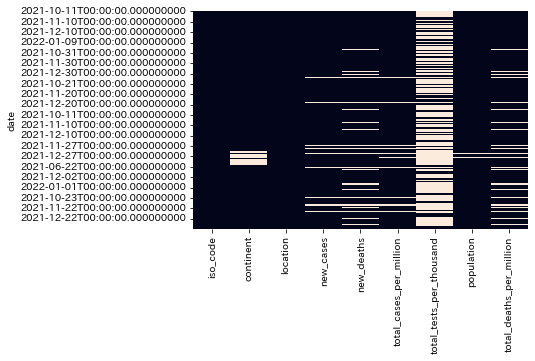

In [38]:
sns.heatmap(df.isnull(), cbar=False);  # カラーバーは非表示に設定

`total_tests_per_thousand` 列に多くの欠損値が存在することがわかりました。  

欠損値に対するアプローチは大きく分けて 2 つになります。  

1. 欠損値の除去
2. 欠損値の補完

### 欠損値除去
欠損値除去とは、名前から推測できるように欠損値を取り除く方法です。欠損値の取り除き方は大きく 2 つです。  

- 行方向に除去する（サンプル数が減少）
- 列方向に除去する（カラム数が減少）

表形式のテーブルデータであれば上記どちらも対応可能ですが、時系列データの場合は行方向に除去してしまうと時間が欠けてしまうためあまりよいアプローチではありません。  

そのため、今回は欠損値の除去は行わずに進めます。（もし欠損値の除去を行う場合のコードは以下です。）

- 行方向に除去する（サンプル数が減少）: df.dropna(subset=`欠損値を削除したいカラム名`)
- 列方向に除去する（カラム数が減少） : df.drop(`削除したいカラム名`, axis=1)

### 欠損値の補完
次は欠損値補完について学びます。欠損値補完とは欠損値を他の値で埋める方法です。具体的には以下です。  

- 前方埋め（直前の時刻のデータで埋める）
- 後方埋め（直後の時刻のデータで埋める）

その他、以下の統計量で埋める方法もあります。  

- 平均値
- 中央値
- 最頻値

また、欠損値近傍の平均値や中央値で埋める移動平均（中央）値といった方法もあります。  

それではまず 1 つの国のデータのみを取得し、欠損値補完を行ってみましょう。  

In [39]:
# Canada のみ取得
canada = df[df['location']=='Canada']

In [40]:
# 欠損値の確認
canada.isnull().sum()

iso_code                    0
continent                   0
location                    0
new_cases                   0
new_deaths                  0
total_cases_per_million     0
total_tests_per_thousand    3
population                  0
total_deaths_per_million    0
dtype: int64

In [41]:
canada.tail()

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2022-01-14,CAN,North America,Canada,40306.0,143.0,71856.527,1441.254,38067913.0,824.894
2022-01-15,CAN,North America,Canada,15314.0,119.0,72258.808,1443.619,38067913.0,828.020
2022-01-16,CAN,North America,Canada,14926.0,53.0,72650.896,NaN,38067913.0,829.412
2022-01-17,CAN,North America,Canada,49644.0,176.0,73954.987,NaN,38067913.0,834.036
2022-01-18,CAN,North America,Canada,13832.0,113.0,74318.337,NaN,38067913.0,837.004


`total_tests_per_thousand` に欠損値があることがわかります。分布も確認しておきます。  

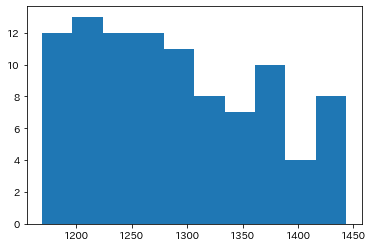

In [42]:
plt.hist(canada['total_tests_per_thousand']);

データのばらつきは小さいですが、少し左に偏りが見られる分布になっています。そのため今回は中央値で補完を検討してみます。  

In [43]:
# 中央値を算出
canada['total_tests_per_thousand'].median()

1278.425

`total_tests_per_thousand` の中央値は 1278.425 でした。それまでの値と比較すると約 200 程違いがあることがわかります。そのため、今回は前方の値で埋めるようにしてみます。  

In [44]:
# 前方埋め
canada = canada.fillna(method='ffill')
canada.tail()

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2022-01-14,CAN,North America,Canada,40306.0,143.0,71856.527,1441.254,38067913.0,824.894
2022-01-15,CAN,North America,Canada,15314.0,119.0,72258.808,1443.619,38067913.0,828.020
2022-01-16,CAN,North America,Canada,14926.0,53.0,72650.896,1443.619,38067913.0,829.412
2022-01-17,CAN,North America,Canada,49644.0,176.0,73954.987,1443.619,38067913.0,834.036
2022-01-18,CAN,North America,Canada,13832.0,113.0,74318.337,1443.619,38067913.0,837.004


欠損値の補完ができていることが確認できました。その他の埋め方は以下を参照してください。  

- 平均値 : `fillna(df.mean())`
- 中央値 : `fillna(df.median())`
- 最頻値 : `fillna(df.mode[0])`
- 前方埋め : `fillna(method='ffill')`
- 後方埋め : `fillna(method='bfill')`

その他の国のデータに関しても欠損値補完を行ってみましょう。  

*※ 今回のデータでは国によって全て欠損となっている列も存在するため、その列の値はすべて 0 で補完するように処理しています。*  

In [45]:
# 空のデータフレームを定義
df_2 = pd.DataFrame()
# すべての国毎に、前方埋めで欠損値を補完する
for co in df['location'].value_counts().index:
    # 国毎にデータを取得
    country = df[df['location'] == co]
    # 前方埋め
    country = country.fillna(method='ffill')
    # 前方埋めで対応できない箇所は 0 で埋める
    country = country.fillna(0)
    # DataFrame の結合
    df_2 = pd.concat([df_2, country], axis=0)

In [46]:
# 欠損値の数を確認する
df_2.isnull().sum()

iso_code                    0
continent                   0
location                    0
new_cases                   0
new_deaths                  0
total_cases_per_million     0
total_tests_per_thousand    0
population                  0
total_deaths_per_million    0
dtype: int64

これで欠損値を全てなくすことができました。  

## 質的変数への対応

文字列データを含めた、カテゴリを表すデータを質的変数といいます。（例えば「男性、女性」というような文字列データ。）既に数字に変換されていれば問題ありませんが、文字列のままの場合はモデルで扱うことができないため、一度数字に変換する必要があります。  

数字に変換する方法は様々ありますが、今回は以下を紹介します。

1. Label Encoding (順序尺度に有効：順序に意味があるもの)
2. One Hot Encoding (名義尺度に有効：順序に意味がないもの)

まずは今回のデータに質的変数があるかどうかを確認してみましょう。`df.select_dtypes(include='object')` で object 型（すなわち質的変数）の値を含むデータのみを取得できます。

In [47]:
# 質的変数を含んだデータのみを抽出
df_obj = df_2.select_dtypes(include='object')
df_obj.head(3)

,iso_code,continent,location
date,,,
2021-10-11,ABW,North America,Aruba
2021-10-12,ABW,North America,Aruba
2021-10-13,ABW,North America,Aruba


`unique()` メソッドで各列のユニークな値（具体的にどのカテゴリが含まれているか）を確認できます。

In [48]:
# ユニークな値の確認
df_obj['iso_code'].unique()[:10] # 10 個だけ表示

array(['ABW', 'OWID_NAM', 'NZL', 'OMN', 'OWID_AFR', 'OWID_ASI',
       'OWID_CYN', 'OWID_EUN', 'OWID_EUR', 'OWID_HIC'], dtype=object)

各列のユニークな値も確認しておきましょう。

In [49]:
for uni in df_obj.columns:
    print(uni)
    print(df_obj[uni].unique()[:10])  # 10 個だけ表示

iso_code
['ABW' 'OWID_NAM' 'NZL' 'OMN' 'OWID_AFR' 'OWID_ASI' 'OWID_CYN' 'OWID_EUN'
 'OWID_EUR' 'OWID_HIC']
continent
['North America' 0.0 'Oceania' 'Asia' 'Europe' 'South America' 'Africa']
location
['Aruba' 'North America' 'New Zealand' 'Oman' 'Africa' 'Asia'
 'Northern Cyprus' 'European Union' 'Europe' 'High income']


それでは文字列から数値に変換を行ってみます。

### Label Encoding　　

Label Encoding は各カテゴリに 0, 1, 2, ... と数値を割り振る変換です。scikit learn の中の `preprocessing` モジュールにある `LabelEncodin()` クラスを使用します。  

In [50]:
# インスタンス化
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
# ラベルの設定
df_2['iso_code'] = le.fit_transform(df_2['iso_code'])

In [52]:
df_2.head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,0,North America,Aruba,19.0,1.0,145948.972,0.0,107195.0,1585.895
2021-10-12,0,North America,Aruba,18.0,0.0,146116.890,0.0,107195.0,1585.895
2021-10-13,0,North America,Aruba,0.0,0.0,146116.890,0.0,107195.0,1585.895


`iso_code` の値が文字列から数字に変換されていることがわかります。それでは `location` についても Label Encoding を適用しましょう。

In [53]:
# location にも適用
df_2['location'] = le.fit_transform(df_2['location'])

In [54]:
df_2.head(3)

,iso_code,continent,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million
date,,,,,,,,,
2021-10-11,0,North America,10,19.0,1.0,145948.972,0.0,107195.0,1585.895
2021-10-12,0,North America,10,18.0,0.0,146116.890,0.0,107195.0,1585.895
2021-10-13,0,North America,10,0.0,0.0,146116.890,0.0,107195.0,1585.895


### One-Hot Encoding

One - Hot Encoding はダミー変数化とも言われ、下記のように各カテゴリの値ごとに 0 1 の列を作成します。

**変換前**

|gender|
|-----|
|male|
|female|
|none|

**変換後**

|gender_male | gender_female | gender_none|
|----- | ----- | -----|
|1 | 0 | 0|
|0 | 1 | 0|
|0 | 0 | 1|

One - Hot Encoding は `pd.get_dummies()` で簡単に行うことができます。引数 `drop_first` では `True` / `False` を指定することができ、`True` にすることで変換後の先頭列を除去します。

**変換後（drop_first = True 適用時）**

|gender_female | gender_none|
|----- | -----|
|0 | 0|
|1 | 0|
|0 | 1|

先頭列を除去した形でも、gender_male を識別することは可能です。削除をしない場合は、作成されたダミー変数間の相関が強くなり、多重共線性といった学習の妨げになる問題が発生する可能性があるため注意しましょう。


In [55]:
# 変換前の shape
df_2.shape

(23728, 9)

In [56]:
# One Hot Encoding で変換
df_2 = pd.get_dummies(df_2, drop_first=True)

In [57]:
df_2.head(3)

,iso_code,location,new_cases,new_deaths,total_cases_per_million,total_tests_per_thousand,population,total_deaths_per_million,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
date,,,,,,,,,,,,,,
2021-10-11,0,10,19.0,1.0,145948.972,0.0,107195.0,1585.895,0,0,0,1,0,0
2021-10-12,0,10,18.0,0.0,146116.890,0.0,107195.0,1585.895,0,0,0,1,0,0
2021-10-13,0,10,0.0,0.0,146116.890,0.0,107195.0,1585.895,0,0,0,1,0,0


In [58]:
# 変換後の shape
df_2.shape

(23728, 14)

文字列データが数値（ダミー変数）に置き換わっていることが確認できます。変換前は入力変数の数が 9 でしたが、14 に増えています。このように **入力変数の数が増える点がOne-Hot Encodingのデメリット** になります。  

カテゴリの数が非常に多いような場合には、グルーピングしてカテゴリ数を減らしたりするとよいでしょう。  

## 【補足】Python 補足資料

### Python
- https://docs.kikagaku.co.jp/python/
- ユーザー名：kikagaku
- パスワード：python

### NumPy
- https://docs.kikagaku.co.jp/numpy/
- ユーザー名：kikagaku
- パスワード：numpy

### Pandas
- https://docs.kikagaku.co.jp/pandas/
- ユーザー名：kikagaku
- パスワード：pandas

### Matplotlib / seaborn
- https://docs.kikagaku.co.jp/matplotlib/
- ユーザー名：kikagaku
- パスワード：matplotlib